# 01. Analysis Seoul CCTV

# 1.데이터 읽기

In [285]:
import pandas as pd

In [286]:
CCTV_Seoul = pd.read_csv("../data/01. Seoul_CCTV.csv", encoding = 'utf-8')

In [287]:
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [288]:
CCTV_Seoul.head(3)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204


In [289]:
CCTV_Seoul.tail()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,2096,1368,218,112,398
21,은평구,2108,1138,224,278,468
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


In [290]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [291]:
CCTV_Seoul.columns[0]

'기관명'

In [292]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : "구별"}, inplace=True)

In [293]:
CCTV_Seoul.head(3)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204


In [294]:
pop_Seoul = pd.read_excel(
    "../data/01. Seoul_Population.xls",header = 2, usecols="B,D,G,J,N"
)

In [295]:
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


In [296]:
pop_Seoul.rename(
    columns={
        pop_Seoul.columns[0] : "구별",
        pop_Seoul.columns[1] : "인구수",
        pop_Seoul.columns[2] : "한국인",
        pop_Seoul.columns[3] : "외국인",
        pop_Seoul.columns[4] : "고령자"
    },
    inplace=True
)

pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


## pandas 기초
- Python에서 R 만큼의 강력한 데이터 핸들링 성능
- 단일 프로세스에서는 최대 효율
- 코딩가능하고 응용 가능한 엑셀로 받아들여도됨
- 누군가 스테로이드를 맞은 엑셀로 표현함

#### Series
- index와 value로 이루어져있다
- 한가지 데이터 타입만 가질수있다.

In [297]:
import pandas as pd
import numpy as np

- pandas는 통상 pd
- numpy는 통상 np

In [298]:
# pd.Series()

In [299]:
pd.Series([1,2,3,4])

0    1
1    2
2    3
3    4
dtype: int64

In [300]:
# pd.Series([1,2,3,4], dtype=float64)

In [301]:
pd.Series([1,2,3,4], dtype=np.float64)

0    1.0
1    2.0
2    3.0
3    4.0
dtype: float64

In [302]:
pd.Series([1,2,3,4], dtype=str)

0    1
1    2
2    3
3    4
dtype: object

In [303]:
pd.Series([1,2,3])

0    1
1    2
2    3
dtype: int64

In [304]:
pd.Series({"Key":"Value"})

Key    Value
dtype: object

In [305]:
data = pd.Series([1,2,3,4,"5"])
data

0    1
1    2
2    3
3    4
4    5
dtype: object

In [306]:
# 짝수
data % 2

TypeError: not all arguments converted during string formatting

In [ ]:
data = pd.Series([1,2,3,4])
data

In [ ]:
data % 2

In [ ]:
dates = pd.date_range("20210101",periods = 6)

### DataFrame
- pd.Series()
    - index, value
- pd.DataFrame()
    - index, value, column

In [ ]:
# 표준정규분포에서 샘플링한 난수 생성
data = np.random.randn(6,4)
data

In [ ]:
df = pd.DataFrame(data, index=dates, columns=["A","B","C","D"])
df

# 데이터 프레임 정보탐색
- df.head()

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.index

In [ ]:
df.columns

In [ ]:
df.values

In [ ]:
df.info()

In [ ]:
df.describe()

### 데이터정렬
- sort_values()
- 특정 컬럼(열)을 기준으로 데이터를 정렬

In [ ]:
df

In [ ]:
df.sort_values(by='B', ascending = False, inplace = True)

In [ ]:
df

### 데이터선택

In [ ]:
df

In [ ]:
# 한개의 컬럼선택
df['A']

In [ ]:
type(df['A'])

In [ ]:
df.A

In [ ]:
# 두개 이상컬럼 선택
df[['A','B']]

### OFFSENT INDEX
- [n:m] : n부터 m-1까지
- 인덱스타 컬럼의 이름으로 slice하는 경우는 끝을 포함한다

In [ ]:
df

In [ ]:
df[0:3]

In [ ]:
df['20210101':'20210104']

- loc : location
- index이름으로 특정 행과 열 선택

In [ ]:
df

In [ ]:
df.loc[:,["A","B"]]

In [ ]:
df.loc["20210102":"20210104", ["A","D"]]

In [ ]:
df.loc['20210102':'20210104','A':'D']

In [ ]:
df.loc['20210102',['A','B']]

- iloc : inter location
    - 컴퓨터가 인식하는 인덱스값으로 선택

In [ ]:
df

In [ ]:
df.iloc[3]

In [ ]:
df.iloc[3,2]

In [ ]:
df.iloc[3:5, 0:2]

In [ ]:
df.iloc[[1,2,4],[0,2]]

In [ ]:
df.iloc[:,1:3]

### condition

In [ ]:
df

In [ ]:
# A컬럼에서 0보다 큰숫자(양수)만 선택

df['A'] > 0

In [ ]:
df[df['A'] > 0]

In [ ]:
df[df>0]

- NaN : Not a Number

### 컬럼추가
- 기존컬럼 없으면 추가
- 기존컬럼 있으면 수정

In [ ]:
df

In [ ]:
df['E'] = ['one','one','two','three','four','five']

In [ ]:
df

- isin()
- 특정요소가 있는지 확인

In [ ]:
df['E'].isin(['two'])

In [ ]:
df[df['E'].isin(['two'])]

### 특정컬럼제거
- del
- drop

In [ ]:
del df['E']
df

In [ ]:
df.drop(['D'], axis=1) # axis = 0 가로 , axis =1 세로

In [ ]:
df.drop(['20210104'])

### apply()

In [ ]:
df

In [ ]:
df['A'].apply('sum')

In [ ]:
df['A'].apply('mean')

In [ ]:
df['A'].apply('min')

In [ ]:
df[['A','D']].apply('sum')

In [ ]:
df['A'].apply(np.sum)

In [ ]:
df['A'].apply(np.mean)

In [ ]:
df['A'].apply(np.std)

In [ ]:
df['A'].apply(np.sum)

In [ ]:
df

In [ ]:
def plusminus(num):
    return 'plus' if num > 0 else 'minus'

In [ ]:
df['A'].apply(plusminus)

In [ ]:
df['A'].apply(lambda num: 'plus' if num > 0 else 'minus')

## 2.CCTV 데이터 흟어보기

In [ ]:
CCTV_Seoul.head()

In [ ]:
CCTV_Seoul.tail()

In [ ]:
CCTV_Seoul.sort_values(by='소계', ascending = True).head(5)

In [ ]:
CCTV_Seoul.sort_values(by='소계', ascending = False).head(5)

In [ ]:
# 기존컬럼 없으면 추가, 있으면 수정
CCTV_Seoul['최근증가율'] = (
    (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + CCTV_Seoul['2014년']) / CCTV_Seoul['2013년도 이전'] * 100
)
CCTV_Seoul.sort_values(by='최근증가율', ascending = False).head(5)

## 3. 인구현황 데이터 흝어보기

In [ ]:
pop_Seoul.head()

In [ ]:
pop_Seoul.tail()

In [ ]:
pop_Seoul.drop([0], axis=0, inplace = True)
pop_Seoul.head()

In [ ]:
pop_Seoul['구별'].unique()

In [ ]:
len(pop_Seoul['구별'].unique())

In [ ]:
# 외국인 비율, 고령자 비율

pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

In [ ]:
pop_Seoul.sort_values(['인구수'], ascending = False).head(5)

In [ ]:
pop_Seoul.sort_values(['외국인'], ascending = False).head(5)

In [ ]:
pop_Seoul.sort_values(['외국인비율'], ascending = False).head()

In [ ]:
pop_Seoul.sort_values(['고령자'], ascending = False).head()

In [ ]:
pop_Seoul.sort_values(['고령자비율'], ascending = False).head()

## 4. 두데이터 합치기

---

### pandas에서 데이터 프레임을 병합하는 방법
- pd.concat
- pd.merge
- pd.join

In [ ]:
pd.merge(left, right)

In [ ]:
# 딕셔너리 안의 리스트 형태


left = pd.DataFrame({
    'key' : ['K0','K4','K2','K3'],
    'A' : ['A0','A1','A2','A3'],
    'B' : ['B0','B1','B2','B3']
})
left

In [ ]:
# 리스트 안의 딕셔너리 형태

right = pd.DataFrame([
    {'key':'K0','C':'C0','D':'D0'},
    {'key':'K1','C':'C1','D':'D1'},
    {'key':'K2','C':'C2','D':'D2'},
    {'key':'K3','C':'C3','D':'D3'},
])
right

### pd.merge() 
- 두 데이터 프레임에서 컬럼이나 인덱스를 기준으로 잡고 병합하는 방법
- 기준이 되는 컬럼이나 인덱스를 키값이라고 한다
- 기준이 되는 키값은 두 데이터프레임에 모두 포함되있어야 한다

In [ ]:
pd.merge(left,right,on='key' )

In [ ]:
pd.merge(left,right,how = 'left', on='key' )

In [ ]:
left

In [ ]:
right

In [ ]:
pd.merge(left,right,how = 'right', on='key' )

In [ ]:
pd.merge(left,right,how = 'outer',on='key' )

In [ ]:
CCTV_Seoul.head()

In [ ]:
pop_Seoul.head()

In [ ]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on = '구별')
data_result.head()

#### 년도별 데이터 컬럼삭제
- del
- drop()

In [ ]:
del data_result['2013년도 이전']

In [ ]:
del data_result['2014년']

In [ ]:
data_result.head()

In [ ]:
data_result.drop(['2015년','2016년'], axis = 1, inplace = True)

In [ ]:
data_result.head()

#### 인덱스 변경
- set_index()
- 선택한 컬럼을 데이터 프레임의 인덱스로 지정

In [ ]:
data_result.set_index('구별',inplace = True)

In [ ]:
data_result.head()

#### 상관계수
- corr()
- correlation 의 약자
- 상관계수가 0.2이상인 데이터 비교

In [ ]:
data_result.corr()

In [ ]:
data_result.info()

In [ ]:
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수']
data_result['CCTV비율'] = data_result['CCTV비율'] * 100
data_result.head()

In [ ]:
data_result.sort_values(by = 'CCTV비율', ascending = False).head()

---

# matplotlib 기초

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc("font", family = "Malgun Gothic")
%matplotlib inline
# get_ipython().run_inline('matplotlib', 'inline')

In [ ]:
plt.figure(figsize=(10,6))
plt.plot([0,1,2,3,4,5,6,7,8,9], [1,1,2,3,4,2,3,5,-1,3])
plt.show()

### 예제1 : 그래프기초

### 삼각함수 그리기
- np.arange(a,b,s) : a부터 b까지 s의간격
    - np.sin(value)

In [ ]:
import numpy as np

t = np.arange(0,12,0.01)
y = np.sin(t)

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(t,np.sin(t))
plt.plot(t,np.cos(t))
plt.show()

- 1. 격자무늬 추가
- 2. 그래프 제목 추가
- 3. x축,y축 제목추가
- 4. 주황색, 파랑색 선 데이터 의미 구문

In [ ]:
def drawGraph():

    plt.figure(figsize=(10,6))
    plt.plot(t,np.sin(t), label='sin')
    plt.plot(t,np.cos(t), label='cos')
    plt.grid(True)
    plt.legend(loc = 3)
    plt.title('Example of sinewave')
    plt.xlabel('time')
    plt.ylabel('Amlitude')
    plt.show()

In [ ]:
drawGraph()

In [ ]:
t = np.arange(0,5,0.5)
t

In [ ]:
plt.figure(figsize =(10,6))
plt.plot(t,t,'r--')
plt.plot(t,t**2,'bs')
plt.plot(t,t**3,'g^')
plt.show()

In [ ]:
# t = [0,1,2,3,4,5,6]
t = list(range(0,7))
y = [1,4,5,8,9,5,3]

In [ ]:
def drawGraph():

    plt.figure(figsize = (10,6))
    plt.plot(
        t,
        y,
        color='red',
        linestyle='--',
        marker='o',
        markerfacecolor='blue',
        markersize=15,
    )
    plt.xlim([-0.5,6.5])
    plt.ylim([0.5,9.5])
    plt.show()
    
drawGraph()

### 예제3 : scatter plot

In [ ]:
t = np.array(range(0,10))
y = np.array([9,8,7,9,8,3,2,4,3,4])

In [ ]:
def drawGraph():

    plt.figure(figsize = (10,6))
    plt.scatter(t,y)
    plt.show()
drawGraph()

In [ ]:
colormap = t

def drawGraph():

    plt.figure(figsize = (10,6))
    plt.scatter(t,y, s=50, c=colormap, marker='o')
    plt.colorbar()
    plt.show()
drawGraph()

### 예재4 : pandas에서 plot 그리기
- matplotlib 을 가져와서 사용

In [ ]:
data_result.head()

In [ ]:
data_result['인구수'].plot(kind='bar',figsize=(10,10))

In [ ]:
data_result['인구수'].plot(kind='barh',figsize=(10,10))

---

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rcParams['axes.unicode_minus'] = False
rc("font", family = 'Malgun Gothic')
%matplotlib inline

In [ ]:
data_result.head()

### 소계 컬럼 시각화

In [ ]:
data_result['소계'].plot(kind='barh',grid=True, figsize=(10,10));

In [ ]:
def drawGraph():
    data_result['소계'].sort_values().plot(kind='barh',grid=True, figsize=(10,10))
drawGraph()

In [ ]:
def drawGraph():
    data_result['소계'].sort_values().plot(kind='barh',grid=True, title = '가장 cctv가 많은 구', figsize=(10,10))
drawGraph()

In [ ]:
data_result.head()

In [ ]:
def drawGraph():
    data_result['소계'].sort_values().plot(kind='barh',grid=True, title = '가장 cctv가 많은 구', figsize=(10,10))
drawGraph()

### 6. 데이터의 경향표시

In [ ]:
data_result.head()

### 인구수와 소계 컬럼으로 scatter plot 그리기

In [ ]:
def drawGraph():
    plt.figure(figsize=(14,10))
    plt.scatter(data_result['인구수'],data_result['소계'], s=50)
    plt.xlabel('인구수')
    plt.ylabel('CCTV')
#     plt.grid(True)
    plt.show()
drawGraph()

#### numpy를 이용한 1차직선 만들기
- np.polyfit():직선을 구성하기 위한 계수를 계산
- np.poly1d():polyfit으로 찾은계수로 파이썬에서 사용할 수 있는 함수로 만들어주는 기능

In [ ]:
import numpy as np


In [ ]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

In [ ]:
f1 = np.poly1d(fp1)
f1

In [ ]:
f1(400000)

- 인구가 40만인 구에서 서울시의 전체 경향에 맞는 적당한 cctv수는?

In [ ]:
fx = np.linspace(100000,700000,100)

- 경향선을 그리기 위한 x데이터생성
- np.linspace(a,b,n):a부터b까지 n개의 등간격 데이터 생성

TypeError: 'bool' object is not callable

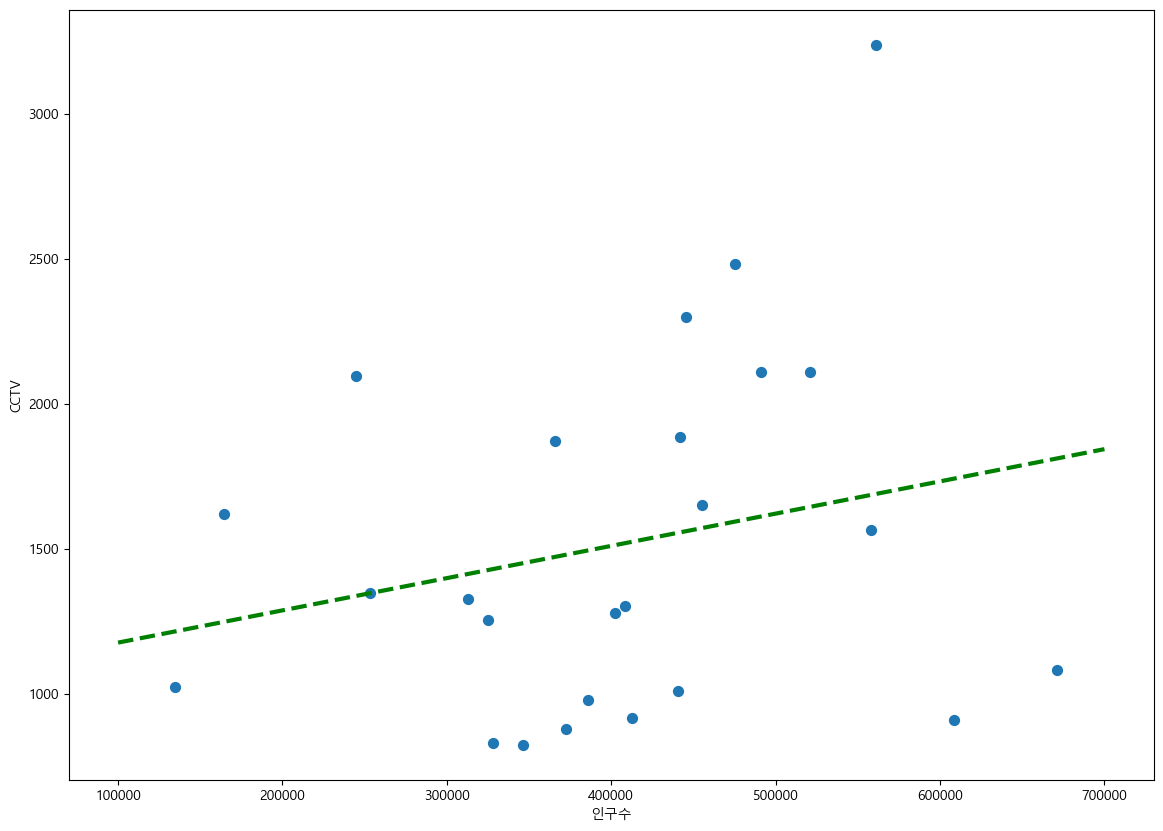

In [309]:
def drawGraph():
    plt.figure(figsize=(14,10))
    plt.scatter(data_result['인구수'],data_result['소계'], s=50)
    plt.plot(fx,f1(fx),ls='dashed', lw=3, color='g')
    plt.xlabel('인구수')
    plt.ylabel('CCTV')
    plt.grid(True)
    plt.show()
drawGraph()

## 7. 강조하고 싶은 데이터를 시각화해보자

### 그래프 다듬기
#### 경향과의 오차 만들기 
- 경향(trend)과의 오차를 만들자
- 경향은 f1 함수에 해당인구를 입력
- f1(data_result['인구수'])

In [315]:
fp1 = np.polyfit(data_result['인구수'],data_result['소계'],1)
f1 = np.poly1d(fp1)
fx = np.linspace(100000,700000,100)

In [316]:
data_result.head()

,소계,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,
강남구,3238,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
강동구,1010,440359,436223,4136,56161,0.939234,12.753458,0.229358,-544.642322
강북구,831,328002,324479,3523,56530,1.074079,17.234651,0.253352,-598.750923
강서구,911,608255,601691,6564,76032,1.079153,12.500021,0.149773,-830.268578
관악구,2109,520929,503297,17632,70046,3.384722,13.446362,0.404854,464.799395


In [317]:
data_result['오차'] = data_result['소계'] - f1(data_result['인구수'])

In [318]:
data_result.head()

,소계,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,
강남구,3238,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
강동구,1010,440359,436223,4136,56161,0.939234,12.753458,0.229358,-544.642322
강북구,831,328002,324479,3523,56530,1.074079,17.234651,0.253352,-598.750923
강서구,911,608255,601691,6564,76032,1.079153,12.500021,0.149773,-830.268578
관악구,2109,520929,503297,17632,70046,3.384722,13.446362,0.404854,464.799395


In [319]:
# 경향과 비교해서 데이터의 오차가 너무나는 데이터를 계산

df_sort_f = data_result.sort_values(by = '오차', ascending = False)
df_sort_t = data_result.sort_values(by = '오차', ascending = True)

In [320]:
# 경향대비 cctv를 많이 가진구
df_sort_f.head()

,소계,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,
강남구,3238,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
양천구,2482,475018,471154,3864,55234,0.813443,11.627770,0.522507,888.832166
용산구,2096,244444,229161,15283,36882,6.252148,15.088118,0.857456,759.128697
서초구,2297,445401,441102,4299,53205,0.965198,11.945415,0.515715,736.753199
은평구,2108,491202,486794,4408,74559,0.897390,15.178888,0.429151,496.842700


In [321]:
# 경향대비 cctv를 적게 가진구
df_sort_t.head()

,소계,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,
강서구,911,608255,601691,6564,76032,1.079153,12.500021,0.149773,-830.268578
송파구,1081,671173,664496,6677,76582,0.994825,11.410173,0.161061,-730.205628
도봉구,825,346234,344166,2068,53488,0.597284,15.448512,0.238278,-625.016861
중랑구,916,412780,408226,4554,59262,1.103251,14.356800,0.221910,-607.986645
광진구,878,372298,357703,14595,43953,3.920247,11.805865,0.235833,-600.988527


In [322]:
from matplotlib.colors import ListedColormap

# colormap 을 사용자 정의(user define)로 세팅
color_step = ['#e75c3c','#2ecc71','#95a9a6','#2ecc71','#3498db','#3489db']
my_cmap = ListedColormap(color_step)

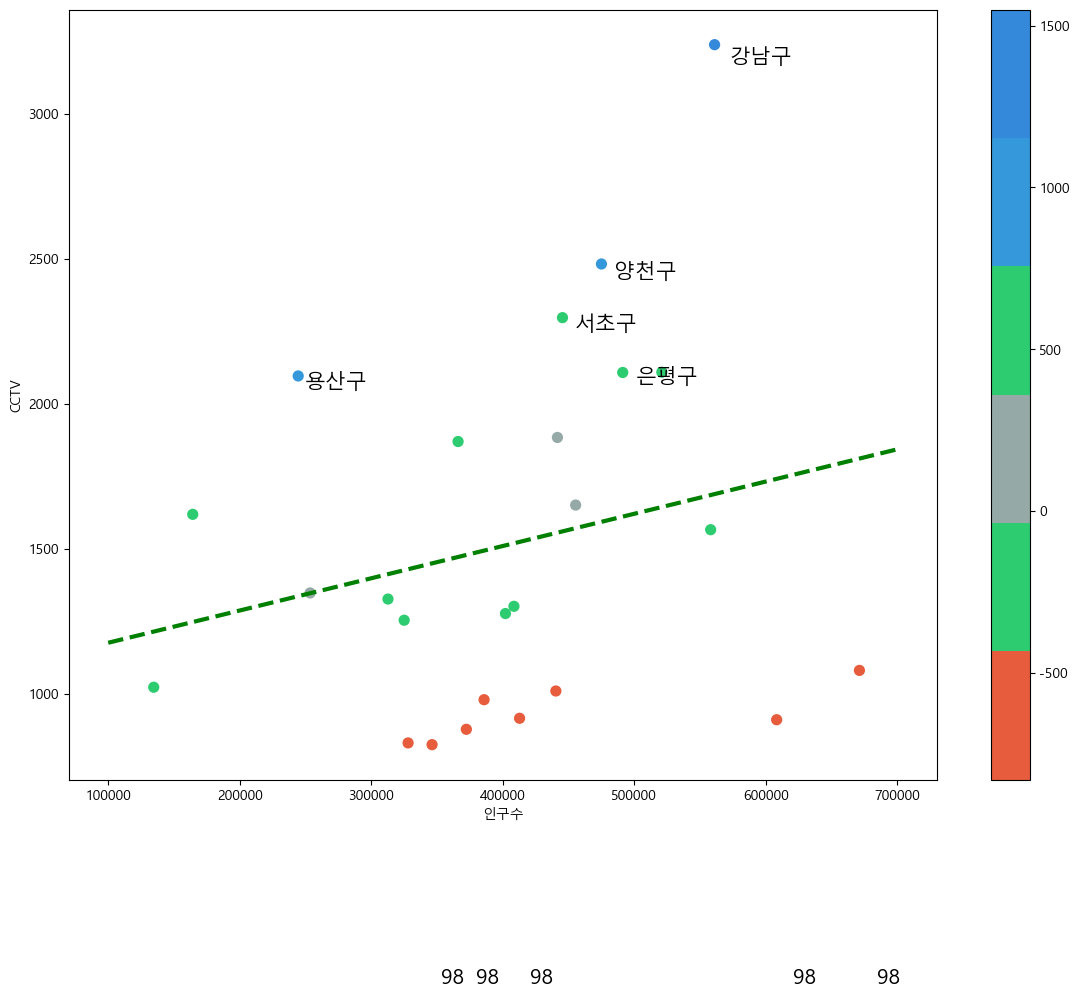

In [325]:
def drawGraph():
    plt.figure(figsize=(14,10))
    plt.scatter(data_result['인구수'],data_result['소계'], s=50, c=data_result['오차'], cmap=my_cmap)
    plt.plot(fx,f1(fx),ls='dashed', lw=3, color='g')
    
    for n in range(5):
        #상위 5개
        plt.text(
            df_sort_f['인구수'][n] * 1.02, # x좌표
            df_sort_f['소계'][n] * 0.98,   # y좌표
            df_sort_f.index[n],           #title
            fontsize=15
        )
        #하위 5개
        plt.text(
            df_sort_t['인구수'][n] * 1.02,
            df_sort_t['소계'][n] * 0.,98,
#             df_sort_t.index[n],
            fontsize=15
        )
    
    plt.xlabel('인구수')
    plt.ylabel('CCTV')
    plt.colorbar()
#     plt.grid(True)
    plt.show()
drawGraph()

In [326]:
data_result['인구수'][0]

561052

In [ ]:
data_result.to_csv("../data/01. CCTV_result.csv", sep=',', encoding = 'utf-8')